In [195]:
import pandas as pd

In [196]:
import numpy as np

In [197]:
import pandas as pd
from ftfy import fix_text
import unicodedata
import re
from io import StringIO

# ----------------------------------------
# 1. Read raw bytes (prevents decoding loss)
# ----------------------------------------
with open("Foodora Data.csv", "rb") as f:
    raw = f.read()

# ----------------------------------------------------------
# 2. Decode with latin1 (keeps bytes unchanged, no corruption)
# ----------------------------------------------------------
text = raw.decode("latin1")

# ----------------------------------------------------------
# 3. Fix mojibake (Û± → ı, AÛô → a, etc.)
# ----------------------------------------------------------
clean_text = fix_text(text)

# ----------------------------------------------------------
# 4. Load back into pandas
# ----------------------------------------------------------
df = pd.read_csv(StringIO(clean_text))

# ----------------------------------------------------------
# 5. OPTIONAL: your ASCII-cleaning function
# ----------------------------------------------------------
def ascii_clean(x):
    if x is None:
        return ""
    s = str(x)
    s = unicodedata.normalize("NFKD", s)      # split diacritics
    s = s.encode("ascii", "ignore").decode()  # remove accents
    s = re.sub(r"\s+", " ", s).strip()        # normalize whitespace
    return s

# Apply to all text columns
text_cols = df.select_dtypes(include="object").columns
for col in text_cols:
    df[col] = df[col].astype(str).apply(ascii_clean)

df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlU Gurme,208,UAstanbul,"Kemankeo Karamustafa Paoa Mahallesi, RUhtUm Ca...",Karaki_y,"Karaki_y, UAstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AUoacU,208,UAstanbul,"Koouyolu Mahallesi, Muhittin iisti_ndaUo Cadde...",Koouyolu,"Koouyolu, UAstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aook Kahve,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [198]:
cc = pd.read_excel('Country-Code.xlsx')
cc

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [199]:
df_merged = pd.merge(df, cc, how='left', on='Country Code')
df_merged

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlU Gurme,208,UAstanbul,"Kemankeo Karamustafa Paoa Mahallesi, RUhtUm Ca...",Karaki_y,"Karaki_y, UAstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AUoacU,208,UAstanbul,"Koouyolu Mahallesi, Muhittin iisti_ndaUo Cadde...",Koouyolu,"Koouyolu, UAstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aook Kahve,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [200]:
df_merged.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [201]:
df_merged.duplicated().sum()

0

In [202]:
df_merged['Restaurant ID'].nunique()

9551

In [203]:
df_merged['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [204]:
df_merged.groupby('Country')['Restaurant ID'].count()

Country
Australia           24
Brazil              60
Canada               4
India             8652
Indonesia           21
New Zealand         40
Phillipines         22
Qatar               20
Singapore           20
South Africa        60
Sri Lanka           20
Turkey              34
UAE                 60
United Kingdom      80
United States      434
Name: Restaurant ID, dtype: int64

In [246]:
df_merged['Votes'].min()

0

In [245]:
df_merged['Votes'].max()

10934

In [205]:
import pandas as pd

country_counts = (
    df_merged
    .groupby('Country')['Restaurant ID']
    .count()
    .reset_index()
    .rename(columns={'Restaurant ID': 'Restaurant_Count'})
)


In [206]:
import plotly.express as px

fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Restaurant_Count',
    color_continuous_scale='YlOrRd',
    title='Restaurant Distribution by Country'
)

fig.update_layout(
    geo=dict(
        bgcolor='#05445e',           # Map background
        showframe=False,
        showcoastlines=True
    ),
    paper_bgcolor='#05445e',        # Outer background
    plot_bgcolor='#05445e',
    font=dict(color='white'),
    title_font=dict(size=20)
)

fig.show()


In [207]:
df_merged

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlU Gurme,208,UAstanbul,"Kemankeo Karamustafa Paoa Mahallesi, RUhtUm Ca...",Karaki_y,"Karaki_y, UAstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AUoacU,208,UAstanbul,"Koouyolu Mahallesi, Muhittin iisti_ndaUo Cadde...",Koouyolu,"Koouyolu, UAstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aook Kahve,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [208]:
df_merged.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [209]:
df_merged.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [210]:
df_merged['Locality'].unique().tolist()

['Century City Mall, Poblacion, Makati City',
 'Little Tokyo, Legaspi Village, Makati City',
 'Edsa Shangri-La, Ortigas, Mandaluyong City',
 'SM Megamall, Ortigas, Mandaluyong City',
 'SM by the Bay, Mall of Asia Complex, Pasay City',
 'Sofitel Philippine Plaza Manila, Pasay City',
 'Kapitolyo',
 'UP Town Center, Diliman, Quezon City',
 'Addition Hills',
 'Little Baguio',
 'Nuvali, Don Jose, Santa Rosa',
 'Solenad 3, Don Jose, Santa Rosa',
 'Tagaytay City',
 'BGC Stopover Pavillion, Bonifacio Global City',
 'Bonifacio Global City',
 'SM Aura Premier, Bonifacio Global City, Taguig City',
 'Asa Norte',
 'Asa Sul',
 'iguas Claras',
 'Brasi_lia Shopping, Asa Norte',
 'Lago Sul',
 'ParkShopping, Guaric I',
 'Pontio Lago Sul, Lago Sul',
 'Setor De Clubes Esportivos Sul',
 'Shopping Iguatemi, Lago Norte',
 'Sudoeste',
 'Barra da Tijuca',
 'Centro',
 'Copacabana',
 'Galeria River, Copacabana',
 'Gicvea',
 'Ipanema',
 'Lagoa',
 'Le Monde, Barra da Tijuca',
 'Leblon',
 'Leme',
 'Madureira',
 'Sa

In [211]:
df_merged['Restaurant Name'].unique().tolist()

['Le Petit Souffle',
 'Izakaya Kikufuji',
 'Heat - Edsa Shangri-La',
 'Ooma',
 'Sambo Kojin',
 'Din Tai Fung',
 'Buffet 101',
 'Vikings',
 'Spiral - Sofitel Philippine Plaza Manila',
 'Locavore',
 'Silantro Fil-Mex',
 "Mad Mark's Creamery & Good Eats",
 "Guevarra's",
 'Sodam Korean Restaurant',
 'Cafe Arabelle',
 "Nonna's Pasta & Pizzeria",
 'Balay Dako',
 'Hobing Korean Dessert Cafe',
 'Wildflour Cafe + Bakery',
 'NIU by Vikings',
 'The Food Hall by Todd English',
 'Chez Michou',
 'Cafi Daniel Briand',
 'Casa do Biscoito Mineiro',
 'Maori',
 'Pizza i Bessa',
 'Sushi Loko',
 'Beirute',
 'New Koto',
 'Sandubas Cafi',
 'Villa Tevere',
 'Rovereto',
 'Buena Carne',
 'Taco Pep',
 'Coco Bambu',
 'Taypic',
 'Outback Steakhouse',
 'Manzuic',
 'Gero',
 'Brazilian American Burgers',
 'Pesqueiro Eco Gourmet',
 'Confeitaria Colombo',
 'Bibi',
 'Cervantes',
 'Amir',
 'TT Burger',
 'Braseiro da Gicvea',
 'Balada Mix',
 'Garota de Ipanema',
 'Zazic BistriC Tropical',
 'Fili de Ouro',
 'D.O.C Ristoran

## Auto EDA

In [212]:
import sweetviz as sv

report = sv.analyze(df_merged)
report.show_html("foodora_sweetviz.html")


                                             |          | [  0%]   00:00 -> (? left)

Report foodora_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## EDA Prep

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

BG_COLOR = "#05445e"
TEXT_COLOR = "white"

sns.set_theme(style="whitegrid")

plt.rcParams.update({
    "figure.facecolor": BG_COLOR,
    "axes.facecolor": BG_COLOR,
    "axes.edgecolor": TEXT_COLOR,
    "axes.labelcolor": TEXT_COLOR,
    "xtick.color": TEXT_COLOR,
    "ytick.color": TEXT_COLOR,
    "text.color": TEXT_COLOR,
    "grid.color": "#6fbfbf",
    "grid.alpha": 0.3,
    "font.weight": "bold"
})


## 1. Some cities show high activity but inconsistent restaurant quality

#### PPT

In [214]:
city_stats = (
    df_merged
    .groupby('City')
    .agg(
        restaurant_count=('Restaurant ID', 'count'),
        avg_rating=('Aggregate rating', 'mean'),
        rating_std=('Aggregate rating', 'std'),
        total_votes=('Votes', 'sum')
    )
    .reset_index()
)

# Keep only top activity cities for clarity
city_stats = city_stats.sort_values(
    by='restaurant_count',
    ascending=False
).head(12)

city_stats

,City,restaurant_count,avg_rating,rating_std,total_votes
88,New Delhi,5473,2.438845,1.500079,628340
50,Gurgaon,1118,2.651431,1.411981,132160
89,Noida,1080,2.036204,1.559109,73488
43,Faridabad,251,1.866932,1.548232,6486
48,Ghaziabad,25,2.852000,0.963985,2366
17,Bhubaneshwar,21,3.980952,0.289170,4243
69,Lucknow,21,4.195238,0.323228,9130
5,Amritsar,21,3.685714,0.255511,3665
2,Ahmedabad,21,4.161905,0.285440,12266
51,Guwahati,21,4.190476,0.312897,4964


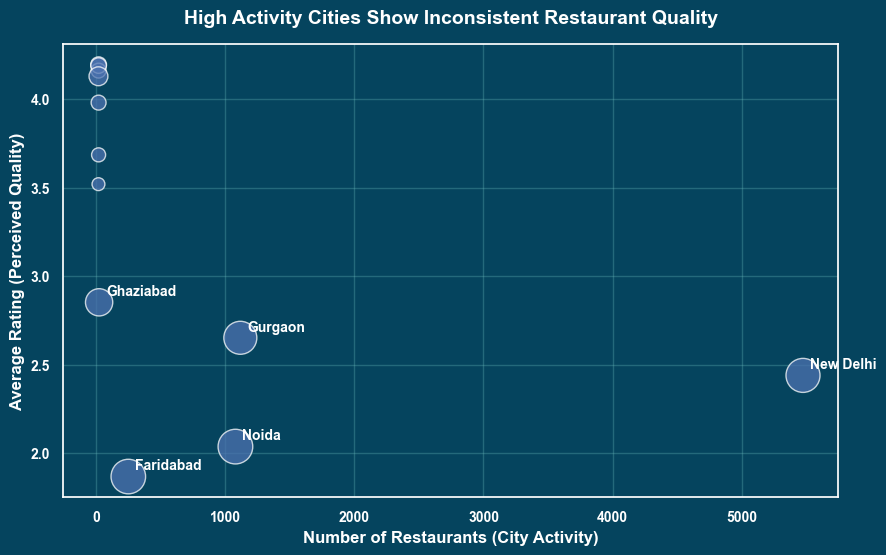

In [215]:
plt.figure(figsize=(10,6))

plt.scatter(
    city_stats['restaurant_count'],
    city_stats['avg_rating'],
    s=city_stats['rating_std'] * 400,
    alpha=0.75,
    edgecolors="white"
)

plt.xlabel(
    "Number of Restaurants (City Activity)",
    fontsize=12,
    fontweight="bold"
)
plt.ylabel(
    "Average Rating (Perceived Quality)",
    fontsize=12,
    fontweight="bold"
)

plt.title(
    "High Activity Cities Show Inconsistent Restaurant Quality",
    fontsize=14,
    fontweight="bold",
    pad=15
)

plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")

top_inconsistent = city_stats.sort_values(
    by='rating_std',
    ascending=False
).head(5)

for _, row in top_inconsistent.iterrows():
    plt.annotate(
        row['City'],
        (row['restaurant_count'], row['avg_rating']),
        xytext=(5,5),
        textcoords="offset points",
        fontsize=10,
        fontweight="bold",
        color="white"
    )

plt.show()


In [216]:
top_cities = (
    df_merged['City']
    .value_counts()
    .head(6)
    .index
)

df_box = df_merged[df_merged['City'].isin(top_cities)]
df_box

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
766,2900587,Tyre Patty,1,Bhubaneshwar,"3rd Floor, BMC Bhawani Mall, Sahid Nagar, Bhub...","BMC Bhawani Mall, Sahid Nagar","BMC Bhawani Mall, Sahid Nagar, Bhubaneshwar",0.000000,0.000000,Cafe,...,No,No,No,No,2,3.9,Yellow,Good,289,India
767,2900354,Silver Streak,1,Bhubaneshwar,"Ground Floor, BMC Bhawani Mall, Sahid Nagar, B...","BMC Bhawani Mall, Sahid Nagar","BMC Bhawani Mall, Sahid Nagar, Bhubaneshwar",85.846838,20.286333,Chinese,...,No,No,No,No,2,4.1,Green,Very Good,379,India
768,2900633,Barbeque Nation,1,Bhubaneshwar,"Plot 12-13/557, 3rd Floor, Mauza Samantapuri,G...",Chandrasekharpur,"Chandrasekharpur, Bhubaneshwar",0.000000,0.000000,"Mediterranean, Asian, Continental, North India...",...,No,No,No,No,3,4.6,Dark Green,Excellent,154,India
769,18408676,Central Perk 7,1,Bhubaneshwar,"Plot 133/A, District Center, Chandrasekharpur,...",Chandrasekharpur,"Chandrasekharpur, Bhubaneshwar",85.817813,20.325539,"Cafe, Charcoal Grill, Steak",...,No,No,No,No,2,4.5,Dark Green,Excellent,145,India
770,2900234,The Chicken Dinesty,1,Bhubaneshwar,"District Center, Niladri Vihar Road, Chandrase...",Chandrasekharpur,"Chandrasekharpur, Bhubaneshwar",85.818567,20.326344,"Fast Food, North Indian, Chinese",...,No,No,No,No,2,3.9,Yellow,Good,247,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108,18255134,Sky Grill,1,Noida,"2nd Floor, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367524,28.557537,"North Indian, Chinese",...,No,Yes,No,No,2,2.6,Orange,Average,34,India
9109,18277023,Bread & Pasta,1,Noida,"Shop 15, Near HDFC Bank, Tulip Mall, Sector 48...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367303,28.557929,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,1,India
9110,18313203,Chillies Cafe,1,Noida,"G-11, Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367188,28.557842,Fast Food,...,No,No,No,No,2,0.0,White,Not rated,3,India
9111,18254559,Platters,1,Noida,"Shop 1, Tulip Mall, Near HDFC Bank, Sector 48,...","Tulip Mall, Sector 48, Noida","Tulip Mall, Sector 48, Noida, Noida",77.367322,28.557930,"North Indian, Chinese",...,No,No,No,No,2,0.0,White,Not rated,0,India


C:\Users\shrey\AppData\Local\Temp\ipykernel_32696\494141611.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




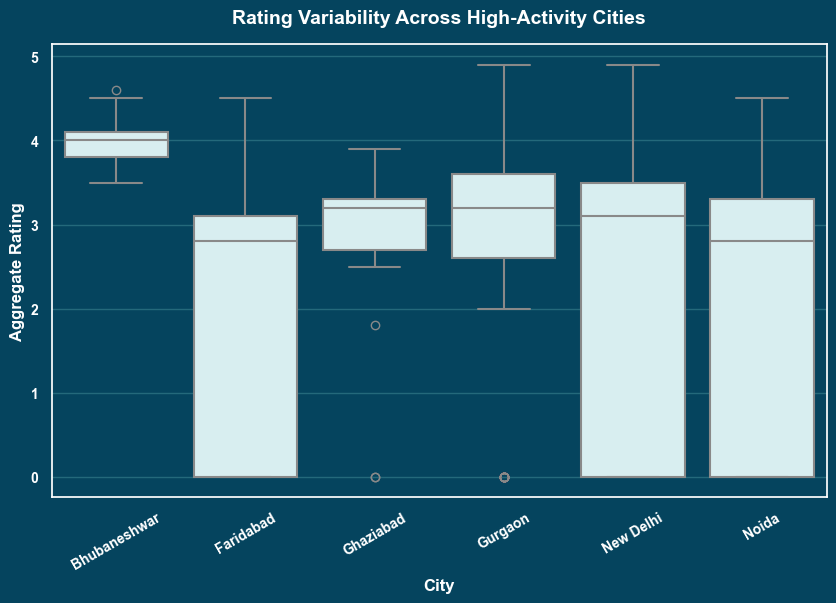

In [217]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_box,
    x='City',
    y='Aggregate rating',
    palette=["#d4f1f4"] * df_box['City'].nunique(),
    linewidth=1.5
)

plt.xlabel("City", fontsize=12, fontweight="bold")
plt.ylabel("Aggregate Rating", fontsize=12, fontweight="bold")

plt.title(
    "Rating Variability Across High-Activity Cities",
    fontsize=14,
    fontweight="bold",
    pad=15
)

plt.xticks(rotation=30, fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")

plt.show()


#### Hypotheses

In [218]:
from scipy.stats import levene

# Select top 6 high-activity cities
top_cities = (
    df_merged["City"]
    .value_counts()
    .head(6)
    .index
)

city_ratings = [
    df_merged[df_merged["City"] == city]["Aggregate rating"]
    for city in top_cities
]

stat, p_value = levene(*city_ratings)

print(f"Levene’s Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.6f}")


Levene’s Test Statistic: 13.7785
P-value: 0.000000


## 2. Certain cuisines attract high customer interest but low satisfaction 

#### PPT

In [219]:
# Explode cuisines
df_cuisine = df_merged.copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.split(', ')
df_cuisine = df_cuisine.explode('Cuisines')

# Aggregate cuisine-level metrics
cuisine_stats = (
    df_cuisine
    .groupby('Cuisines')
    .agg(
        avg_rating=('Aggregate rating', 'mean'),
        avg_votes=('Votes', 'mean'),
        restaurant_count=('Restaurant ID', 'count')
    )
    .query('restaurant_count > 30')  # remove low-volume noise
    .reset_index()
)

cuisine_stats

,Cuisines,avg_rating,avg_votes,restaurant_count
0,American,3.661538,469.530769,390
1,Asian,3.815021,447.652361,233
2,BBQ,3.903030,292.333333,33
3,Bakery,2.440940,77.444295,745
4,Bar Food,3.933333,402.153846,39
5,Beverages,2.740175,91.864629,229
6,Biryani,2.420339,105.163842,177
7,Breakfast,3.965854,392.609756,41
8,Burger,3.520717,305.764940,251
9,Cafe,3.321195,252.586060,703


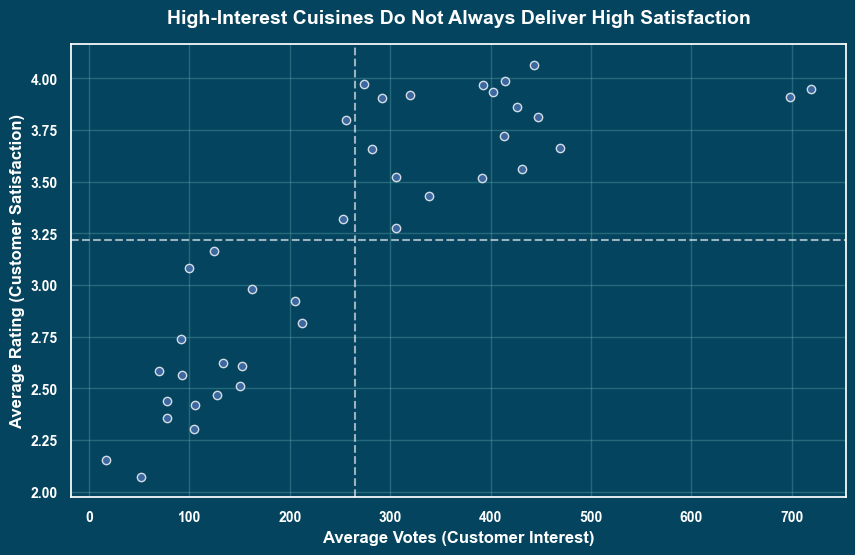

In [220]:
plt.figure(figsize=(10,6))

plt.scatter(
    cuisine_stats['avg_votes'],
    cuisine_stats['avg_rating'],
    alpha=0.8,
    edgecolors="white"
)

plt.axhline(
    cuisine_stats['avg_rating'].mean(),
    linestyle='--',
    color='white',
    alpha=0.6
)
plt.axvline(
    cuisine_stats['avg_votes'].mean(),
    linestyle='--',
    color='white',
    alpha=0.6
)

plt.xlabel(
    "Average Votes (Customer Interest)",
    fontsize=12,
    fontweight="bold"
)
plt.ylabel(
    "Average Rating (Customer Satisfaction)",
    fontsize=12,
    fontweight="bold"
)

plt.title(
    "High-Interest Cuisines Do Not Always Deliver High Satisfaction",
    fontsize=14,
    fontweight="bold",
    pad=15
)

plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")

problem_cuisines = cuisine_stats[
    (cuisine_stats['avg_votes'] > cuisine_stats['avg_votes'].mean()) &
    (cuisine_stats['avg_rating'] < cuisine_stats['avg_rating'].mean())
].sort_values('avg_votes', ascending=False).head(3)

for _, row in problem_cuisines.iterrows():
    plt.annotate(
        row['Cuisines'],
        (row['avg_votes'], row['avg_rating']),
        xytext=(5,5),
        textcoords="offset points",
        fontsize=10,
        fontweight="bold",
        color="white"
    )

plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_32696\3561106260.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




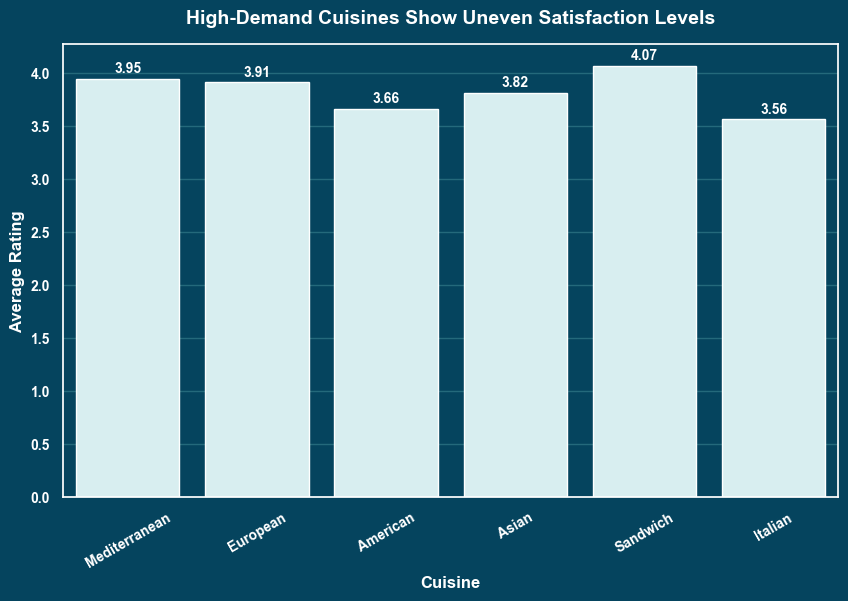

In [221]:
top_interest = cuisine_stats.sort_values(
    by='avg_votes',
    ascending=False
).head(6)

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=top_interest,
    x='Cuisines',
    y='avg_rating',
    palette=["#d4f1f4"] * len(top_interest)
)

# Axis labels
plt.xlabel(
    "Cuisine",
    fontsize=12,
    fontweight="bold"
)
plt.ylabel(
    "Average Rating",
    fontsize=12,
    fontweight="bold"
)

# Title
plt.title(
    "High-Demand Cuisines Show Uneven Satisfaction Levels",
    fontsize=14,
    fontweight="bold",
    pad=15
)

# Tick styling
plt.xticks(
    rotation=30,
    fontsize=10,
    fontweight="bold"
)
plt.yticks(
    fontsize=10,
    fontweight="bold"
)

# 🔹 ADD DATA LABELS (BOLD)
for bar in ax.patches:
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        value + 0.03,                   # slight offset above bar
        f"{value:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='white'
    )

plt.show()


#### Hypotheses

In [222]:
from scipy.stats import kruskal

# Top 6 cuisines by demand (votes)
top_cuisines = (
    cuisine_stats.sort_values("avg_votes", ascending=False)
    .head(6)["Cuisines"]
)

cuisine_ratings = [
    df_merged[df_merged["Cuisines"].str.contains(cuisine, na=False)]
    ["Aggregate rating"]
    for cuisine in top_cuisines
]

stat, p_value = kruskal(*cuisine_ratings)

print(f"Kruskal–Wallis Statistic: {stat:.4f}")
print(f"P-value: {p_value:.6f}")


Kruskal–Wallis Statistic: 71.5191
P-value: 0.000000


## 3. Localities within cities vary widely in performance

#### PPT

In [223]:
# Pick one high-activity city
city_name = "New Delhi"  # change if needed

city_df = df_merged[df_merged["City"] == city_name]

# Top 6 localities by restaurant count
top_localities = (
    city_df.groupby("Locality")
    .size()
    .sort_values(ascending=False)
    .head(6)
    .index
)

city_df = city_df[city_df["Locality"].isin(top_localities)]
city_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
2999,53,Amber,1,New Delhi,"N-19, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.220891,28.630197,"North Indian, Chinese, Mughlai",...,Yes,Yes,No,No,3,2.6,Orange,Average,152,India
3000,307271,Attitude Kitchen & Bar,1,New Delhi,"N-12, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.220352,28.630044,"North Indian, Continental, Italian",...,Yes,No,No,No,3,2.9,Orange,Average,140,India
3001,596,Cafe Coffee Day,1,New Delhi,"4, Rajiv Chowk, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.219813,28.632961,Cafe,...,No,Yes,No,No,1,3.4,Orange,Average,277,India
3002,1127,Castle 9,1,New Delhi,"B-45/47, 1st Floor, Near PVR Plaza, Connaught ...",Connaught Place,"Connaught Place, New Delhi",77.219498,28.634857,"Finger Food, Continental, North Indian, Chinese",...,Yes,No,No,No,3,3.1,Orange,Average,1099,India
3003,4237,Costa Coffee,1,New Delhi,"Shop 49, Bengali Market, Connaught Place, New ...",Connaught Place,"Connaught Place, New Delhi",77.232192,28.629256,Cafe,...,No,No,No,No,2,3.4,Orange,Average,76,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7170,18435823,Sultan Chicken Corner,1,New Delhi,"A -1, Loni Road, Jyoti Colony, Shahdara, New D...",Shahdara,"Shahdara, New Delhi",77.292032,28.687658,Mughlai,...,No,No,No,No,1,0.0,White,Not rated,0,India
7171,18474418,The AB's Kitchen,1,New Delhi,"Shop A 1, GTB Enclave, Shahdara, New Delhi",Shahdara,"Shahdara, New Delhi",0.000000,0.000000,"Chinese, North Indian",...,No,No,No,No,1,0.0,White,Not rated,3,India
7172,18423861,Wah Ji Wah,1,New Delhi,"366, Main 100 Fret Road, Durgapuri Extension, ...",Shahdara,"Shahdara, New Delhi",77.294881,28.689470,"North Indian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,1,India
7173,18435803,Yum Yum,1,New Delhi,"Z-21, Naveen Shahdra, Shahdara, New Delhi",Shahdara,"Shahdara, New Delhi",77.284678,28.677429,"Pizza, Burger, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,2,India


C:\Users\shrey\AppData\Local\Temp\ipykernel_32696\1739394714.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




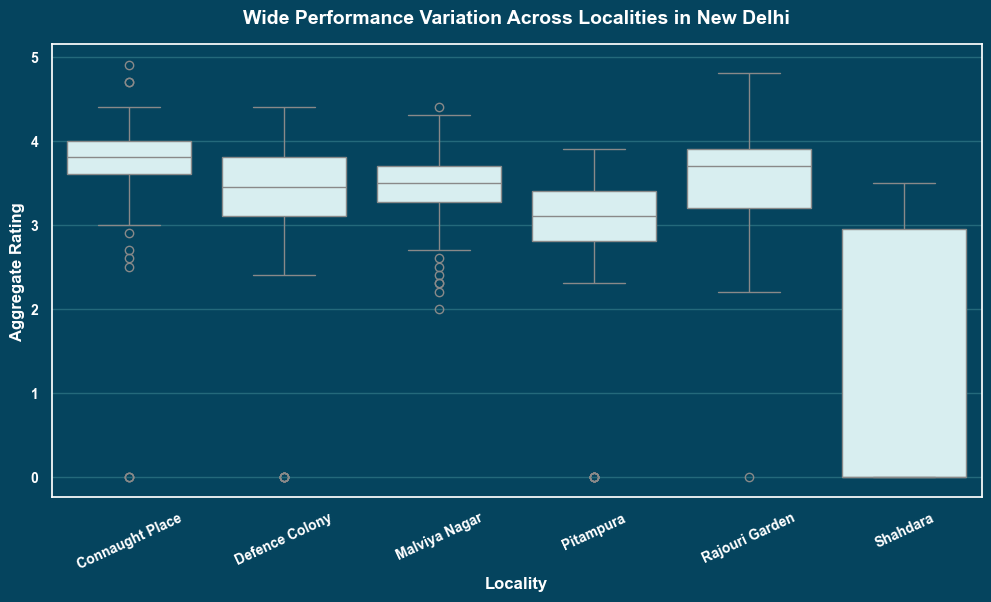

In [224]:
plt.figure(figsize=(12,6))

ax = sns.boxplot(
    data=city_df,
    x="Locality",
    y="Aggregate rating",
    palette=["#d4f1f4"] * city_df["Locality"].nunique()
)

plt.xlabel(
    "Locality",
    fontsize=12,
    fontweight="bold"
)
plt.ylabel(
    "Aggregate Rating",
    fontsize=12,
    fontweight="bold"
)

plt.title(
    f"Wide Performance Variation Across Localities in {city_name}",
    fontsize=14,
    fontweight="bold",
    pad=15
)

plt.xticks(
    rotation=25,
    fontsize=10,
    fontweight="bold"
)
plt.yticks(
    fontsize=10,
    fontweight="bold"
)

plt.show()


C:\Users\shrey\AppData\Local\Temp\ipykernel_32696\1379212776.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




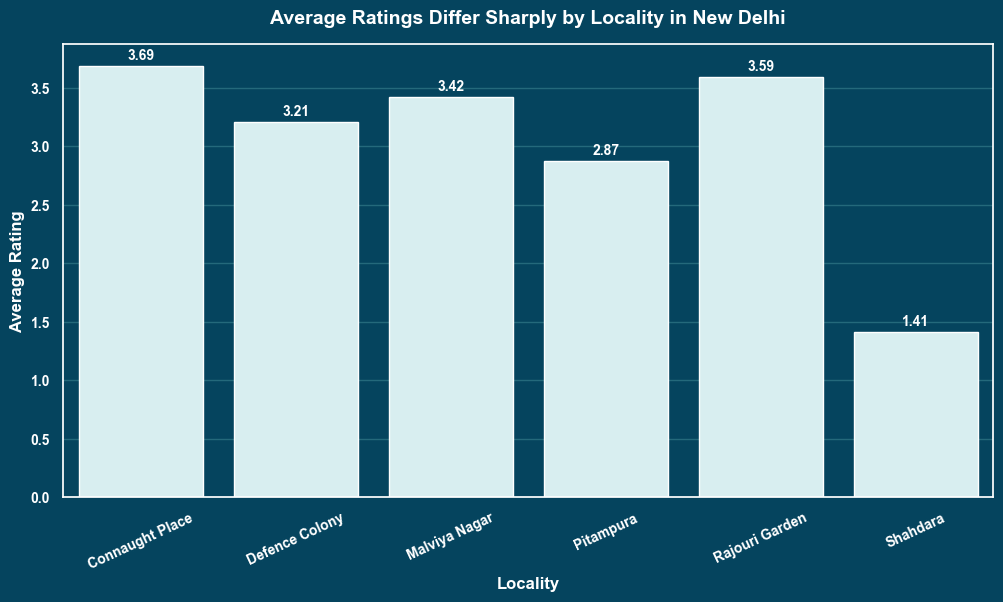

In [225]:
locality_avg = (
    city_df.groupby("Locality")["Aggregate rating"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,6))

ax = sns.barplot(
    data=locality_avg,
    x="Locality",
    y="Aggregate rating",
    palette=["#d4f1f4"] * len(locality_avg)
)

plt.xlabel(
    "Locality",
    fontsize=12,
    fontweight="bold"
)
plt.ylabel(
    "Average Rating",
    fontsize=12,
    fontweight="bold"
)

plt.title(
    f"Average Ratings Differ Sharply by Locality in {city_name}",
    fontsize=14,
    fontweight="bold",
    pad=15
)

plt.xticks(
    rotation=25,
    fontsize=10,
    fontweight="bold"
)
plt.yticks(
    fontsize=10,
    fontweight="bold"
)

# 🔹 DATA LABELS
for bar in ax.patches:
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        value + 0.03,
        f"{value:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="white"
    )

plt.show()


#### Hypotheses

In [226]:
from scipy.stats import f_oneway

city_name = "New Delhi"  # same city used in EDA

locality_groups = [
    group["Aggregate rating"]
    for _, group in df_merged[df_merged["City"] == city_name]
    .groupby("Locality")
    if len(group) >= 10   # avoid tiny samples
]

stat, p_value = f_oneway(*locality_groups)

print(f"ANOVA F-statistic: {stat:.4f}")
print(f"P-value: {p_value:.6f}")


ANOVA F-statistic: 27.3944
P-value: 0.000000


## 4. Online delivery adoption and ratings are uneven across markets

#### PPT

C:\Users\shrey\AppData\Local\Temp\ipykernel_32696\146734924.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




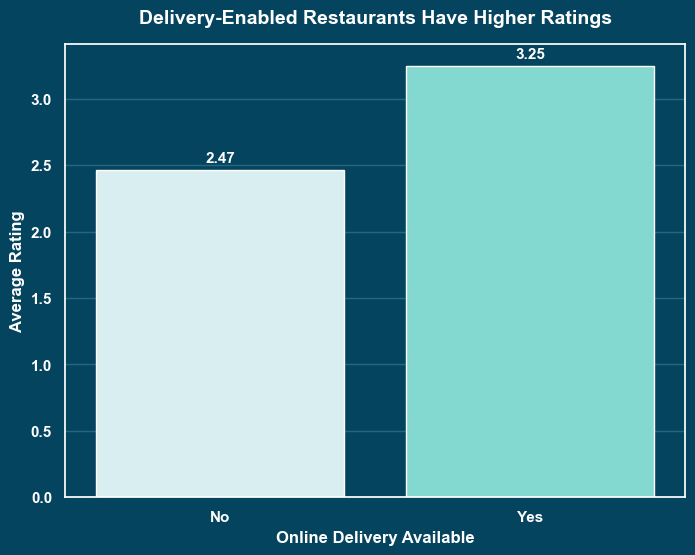

In [227]:
delivery_rating = (
    df_merged.groupby("Has Online delivery")["Aggregate rating"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=delivery_rating,
    x="Has Online delivery",
    y="Aggregate rating",
    palette=["#d4f1f4", "#75e6da"]
)

plt.xlabel(
    "Online Delivery Available",
    fontsize=12,
    fontweight="bold"
)
plt.ylabel(
    "Average Rating",
    fontsize=12,
    fontweight="bold"
)

plt.title(
    "Delivery-Enabled Restaurants Have Higher Ratings",
    fontsize=14,
    fontweight="bold",
    pad=15
)

plt.xticks(
    fontsize=11,
    fontweight="bold"
)
plt.yticks(
    fontsize=11,
    fontweight="bold"
)

# 🔹 DATA LABELS
for bar in ax.patches:
    value = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        value + 0.03,
        f"{value:.2f}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
        color="white"
    )

plt.show()


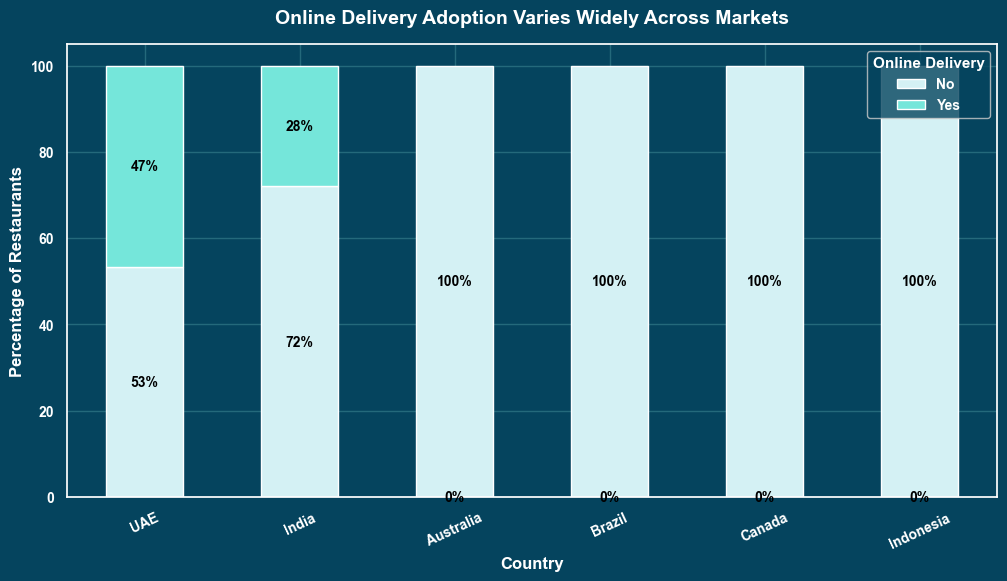

In [228]:
delivery_country = (
    df_merged.groupby(["Country", "Has Online delivery"])
    .size()
    .unstack(fill_value=0)
)

delivery_country_pct = delivery_country.div(
    delivery_country.sum(axis=1), axis=0
) * 100

delivery_country_pct = delivery_country_pct.sort_values(
    by="Yes", ascending=False
).head(6)

delivery_country_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=["#d4f1f4", "#75e6da"]
)

plt.xlabel(
    "Country",
    fontsize=12,
    fontweight="bold"
)
plt.ylabel(
    "Percentage of Restaurants",
    fontsize=12,
    fontweight="bold"
)

plt.title(
    "Online Delivery Adoption Varies Widely Across Markets",
    fontsize=14,
    fontweight="bold",
    pad=15
)

plt.xticks(
    rotation=25,
    fontsize=10,
    fontweight="bold"
)
plt.yticks(
    fontsize=10,
    fontweight="bold"
)

# 🔹 DATA LABELS
for container in plt.gca().containers:
    plt.bar_label(
        container,
        fmt="%.0f%%",
        label_type="center",
        fontsize=10,
        fontweight="bold",
        color="black"
    )

plt.legend(
    title="Online Delivery",
    title_fontsize=11,
    fontsize=10
)

plt.show()


#### Hypotheses

In [229]:
from scipy.stats import ttest_ind

delivery_yes = df_merged[
    df_merged["Has Online delivery"] == "Yes"
]["Aggregate rating"]

delivery_no = df_merged[
    df_merged["Has Online delivery"] == "No"
]["Aggregate rating"]

stat, p_value = ttest_ind(
    delivery_yes,
    delivery_no,
    equal_var=False  # safer assumption
)

print(f"T-test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.6f}")


T-test Statistic: 30.2882
P-value: 0.000000


## Chi Square

In [230]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(
    df_merged['Price range'],
    df_merged['Rating text']
)

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", round(chi2, 2))
print("Degrees of freedom:", dof)
print("p-value:", p)


Chi-square statistic: 2877.24
Degrees of freedom: 15
p-value: 0.0


In [231]:
expected_df = pd.DataFrame(
    expected,
    index=contingency.index,
    columns=contingency.columns
)

(expected_df < 5).sum().sum()


0

In [232]:
import numpy as np

# Standardized residuals
std_residuals = (contingency - expected_df) / np.sqrt(expected_df)

std_residuals


Rating text,Average,Excellent,Good,Not rated,Poor,Very Good
Price range,,,,,,
1,3.817978,-9.130405,-11.808271,22.159587,-2.638338,-15.979747
2,5.930726,-2.938585,4.186861,-11.266531,4.800356,-1.422864
3,-10.135976,12.253858,10.708783,-15.827976,-1.416994,20.372074
4,-8.471946,12.922222,6.268599,-10.521801,-1.602053,15.706861


## Final Export

In [233]:
df_merged

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlU Gurme,208,UAstanbul,"Kemankeo Karamustafa Paoa Mahallesi, RUhtUm Ca...",Karaki_y,"Karaki_y, UAstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AUoacU,208,UAstanbul,"Koouyolu Mahallesi, Muhittin iisti_ndaUo Cadde...",Koouyolu,"Koouyolu, UAstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aook Kahve,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [234]:
df_exploded = df_merged.assign(
    Cuisine=df_merged['Cuisines'].str.split(',')
).explode('Cuisine')

df_exploded['Cuisine'] = df_exploded['Cuisine'].str.strip()
df_exploded

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cuisine
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,French
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Japanese
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Desserts
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,Seafood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,5908749,Ceviz AUoacU,208,UAstanbul,"Koouyolu Mahallesi, Muhittin iisti_ndaUo Cadde...",Koouyolu,"Koouyolu, UAstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,3,4.2,Green,Very Good,1034,Turkey,Cafe
9548,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,Turkey,Italian
9548,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,Turkey,World Cuisine
9549,5916112,Aook Kahve,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,4,4.0,Green,Very Good,901,Turkey,Restaurant Cafe


In [235]:
df_exploded.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
Cuisine                 0
dtype: int64

In [236]:
df_exploded.dropna(inplace=True)

In [237]:
df_exploded.duplicated().sum()

5

In [238]:
df_exploded.drop_duplicates(inplace=True)
df_exploded

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cuisine
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,French
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Japanese
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Desserts
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,Seafood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,5908749,Ceviz AUoacU,208,UAstanbul,"Koouyolu Mahallesi, Muhittin iisti_ndaUo Cadde...",Koouyolu,"Koouyolu, UAstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,3,4.2,Green,Very Good,1034,Turkey,Cafe
9548,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,Turkey,Italian
9548,5915807,Huqqa,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,Turkey,World Cuisine
9549,5916112,Aook Kahve,208,UAstanbul,"Kurui_eome Mahallesi, Muallim Naci Caddesi, No...",Kurui_eome,"Kurui_eome, UAstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,4,4.0,Green,Very Good,901,Turkey,Restaurant Cafe


In [239]:
df_exploded.to_csv('final data.csv', index=False)

In [240]:
df_exploded.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
Cuisine                 0
dtype: int64

In [241]:
df_exploded.duplicated().sum()

0